# ¡Hola Rodrigo! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Rodrigo, has logrado implementar adecuadamente varias tareas esenciales del análisis de datos, como la limpieza y transformación de datos, el manejo de valores nulos y la correcta aplicación de pruebas estadísticas, lo cual demuestra una base sólida y atención a los detalles técnicos. 

Sin embargo, aún hay aspectos clave por fortalecer: es importante que no solo generes visualizaciones, sino que también las analices y expliques su relevancia dentro del contexto del problema. Además, en el análisis de correlación es fundamental elegir adecuadamente las variables a comparar para evitar interpretaciones erróneas; en este caso, se debe corregir el enfoque para incluir correctamente los puntajes de los usuarios y críticos.

¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Estaré atento a tu próxima iteración 👀



</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Rodrigo excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. 

Asimismo, hiciste un excelente trabajo en tu análisis de la información obtenida. Has presentado interpretaciones claras y bien fundamentadas que transforman el código en una herramienta real para la toma de decisiones. Incluir estos análisis es clave, ya que no solo muestra habilidades técnicas, sino también la capacidad de extraer valor de los datos y comunicar insights de manera efectiva. 

Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

# Proyecto integrado Sprint 6

## Imports iniciales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Abrir archivo y preparar datos

In [3]:
df=pd.read_csv('/datasets/games.csv')

In [4]:
collumns=df.columns

In [5]:
columnas=df.columns

In [6]:
print(columnas)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [7]:
columnaslow=[]
for columna in columnas:
    columnaslow.append(columna.lower())

In [8]:
print(columnaslow)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [9]:
df.columns=columnaslow

In [10]:
df.columns  #Actualizar los nombres de columnas para no incluír mayúsculas

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

En este punto los mommbres de las columnas están en minúsculas, se ha verificadoque no haya espacion intermedios o extremos en los mismos.

Ajustar tipos de datos para trabajar con ellos

In [11]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [12]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo! Tu código realiza correctamente la lectura del archivo CSV y transforma todos los nombres de las columnas a minúsculas, lo cual es una buena práctica para evitar errores por mayúsculas/minúsculas en análisis posteriores.

</div>

In [13]:
# Comienza proceso de convertir a int la columna 'year_of_release'
df['year_of_release']=df['year_of_release'].fillna(0)

Después. cambiamos las columnas de evaluaciones de usuarios y críticos a float, porque haremos cálculos que requieren estos valores.

In [14]:
df=df.replace({'tbd':5})  #Eliminando los valores marcados como 'tbd', para poder hacer cálculos posteriores. Se deja un valor de 5



In [15]:
df['critic_score']=df['critic_score'].astype('float16')

In [16]:
df['critic_score']=df['critic_score'].astype('float16')

In [17]:
df['user_score']=df['user_score'].astype('float16')

In [18]:
df=df.fillna({'critic_score':df['critic_score'].median(),'user_score':df['user_score'].median(),'rating':'T'})

En el paso enterior se reeplazaron valores ausentes por la mediana de la columna en oarticular, o el valor T (adolescentes +) pare el ratingl

In [19]:
nan_counts = df.isna().sum()
print(nan_counts)

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [20]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float16
user_score         float16
rating              object
dtype: object

La conversión de tipo de datos, y el manejo de datos ausentes fue un éxito!

In [21]:
tbds=df[df['user_score']=='tbd']
print(tbds)

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [22]:
print(df.duplicated().sum())

0


No existene elmentos duplicados!

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy bien! Has hecho un excelente trabajo convirtiendo los tipos de datos y tratando los valores nulos de forma efectiva.

</div>

### Agrupación de todas las ventas en 'ventas_totales'

In [23]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

#### Para cada juego, existirá la columna Ventas Totales, que suma las ventas en las tres regiones.

## PASO 3

### Número de juegos lanzados por año

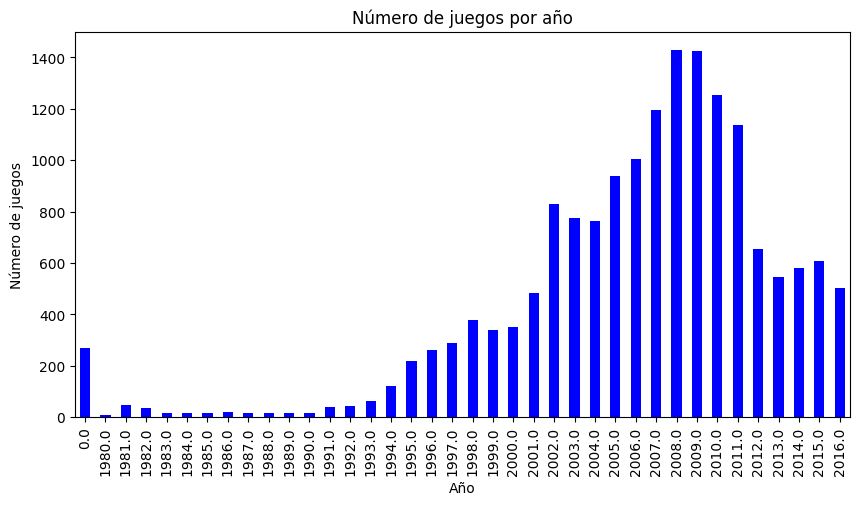

In [24]:
games_per_year = df['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(10,5))
games_per_year.plot(kind='bar', color='b')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.title('Número de juegos por año')
plt.show()

### Podemos observar que desde el año 2012 hay una diferencia drástica en las ventas de videojuegos en las tres regiones estudiadas. Una posible razón para esto es la popularización de juegos en línea, que no necesitan que el programa se aloje en la computadora o una consola en particular, como las que se estudian en este análisis.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Seria interesante que incluyeras tus ideas sobre la razón de este comportamiento de los datos

</div>

In [25]:
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


#### 

In [26]:
dfpost12 = df[df['year_of_release']>=2012]


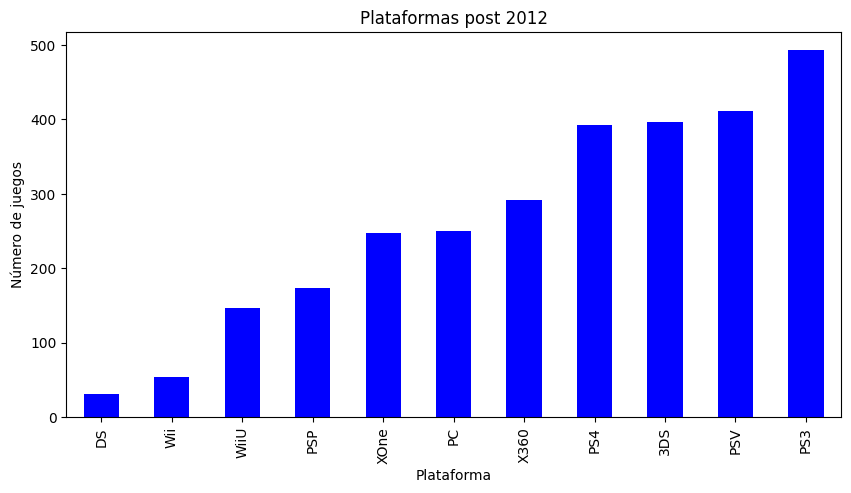

In [27]:
games_per_year = dfpost12['platform'].value_counts().sort_index().sort_values()
plt.figure(figsize=(10,5))
games_per_year.plot(kind='bar', color='b')
plt.xlabel('Plataforma')
plt.ylabel('Número de juegos')
plt.title('Plataformas post 2012')

plt.show()

#### De esta gráfica podemos concluír que las cinco plataformas con más juegos fueron 3DS, PS3, PS4 y PSV

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Cuando se trata de gráficas de barras te recomiendo siempre ordenarlas por tamaño y no por orden alfabetico, esto facilita su interpretación

</div>

In [28]:
top_sale_plats=dfpost12.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

In [29]:
top_sale_plats.head()

,year_of_release,platform,total_sales
0,2012.0,3DS,51.36
1,2012.0,DS,11.01
2,2012.0,PC,23.22
3,2012.0,PS3,107.36
4,2012.0,PSP,7.69


### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

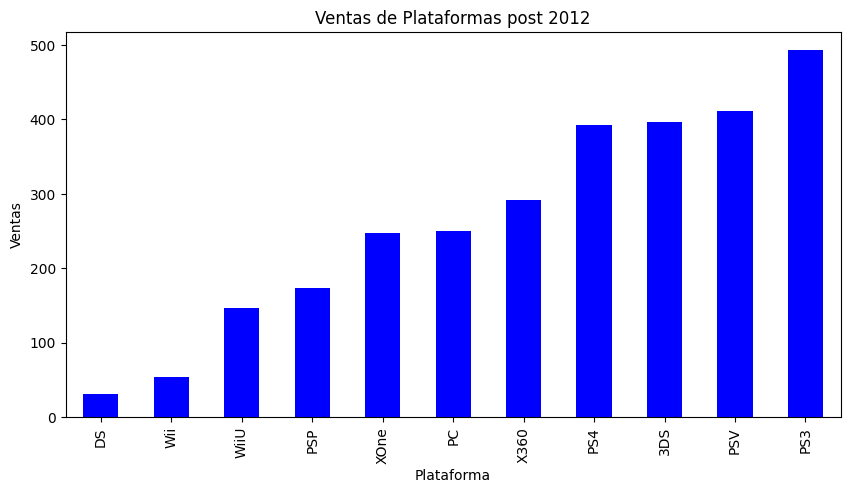

In [30]:
higher_revenue = top_sale_plats['total_sales'].sum()
plt.figure(figsize=(10,5))
games_per_year.plot(kind='bar', color='b')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.title('Ventas de Plataformas post 2012')
plt.show()

#### En este gráfico podemos observar que las plataformas con más ventas desde 2012 fueron 3DS, PS3, PS4, PSV, y X360

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [31]:
PopPlatforms=dfpost12[(dfpost12['platform']=='3DS')|(dfpost12['platform']=='PS3')|(dfpost12['platform']=='PS4')|(dfpost12['platform']=='PSV')|(dfpost12['platform']=='X360')]

In [32]:
dfvl = dfpost12.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
dfvl['dif'] = dfvl['max']-dfvl['min']

dfvl['dif'].mean()

3.4545454545454546

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

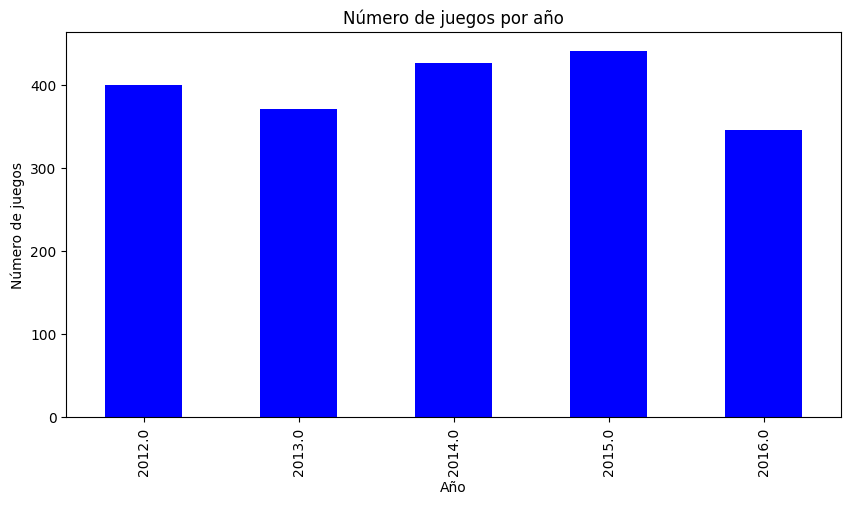

In [33]:
games_per_year = PopPlatforms['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(10,5))
games_per_year.plot(kind='bar', color='b')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.title('Número de juegos por año')
plt.show()

#### Según el punto 30, deberíamos estudiar el periodeo de 1012 a 2016

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

#### Las plataformas líderes, tomando en cuenta los años anteriormente dichos, son  3DS, PS3, PS4, PSV, y X360, aunque todas las platafor,as se encuentran en decrecimiento.

## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

In [34]:
AñosSelect=PopPlatforms[PopPlatforms['year_of_release']> 2012]

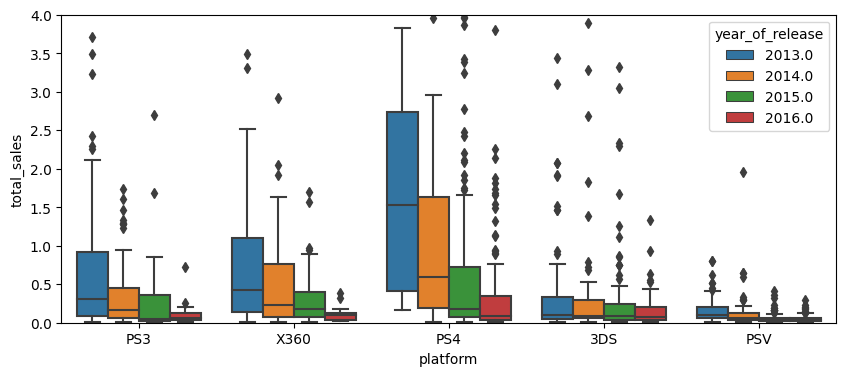

In [35]:
plt.figure(figsize=(10,4))
sns.boxplot(data=AñosSelect, x="platform", y="total_sales", hue="year_of_release")
plt.ylim(0, 4)
plt.show()

#### En la figura anterior vemos cómo se comportan las ventas de las cinco plataformas más vendidas en los últimos cuatro años. Es de resaltarse que en el caso de todas ellas, los datos de 2013 son mayores que los de los otros tres años, aunque Play Station 4 muestra números relativamente altos en sus ventas de 2014.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La gráfica que has obtenido es correcta, pero es crucial acompañarla con tu análisis y observaciones. Esto añade valor significativo a la información presentada y evita que solo sean datos sin contexto. Desarrollar esta capacidad de interpretación es esencial cuanto estamos trabajando con datos en entornos empresariales.

</div>

## Reseñas Profesionales vs. Ventas


### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular 

In [36]:

top_sale_platsañosTop=AñosSelect[(AñosSelect['platform']=='DS')|(AñosSelect['platform']=='PS3')|(AñosSelect['platform']=='Wii')|(AñosSelect['platform']=='X360')|(AñosSelect['platform']=='PS2')]

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

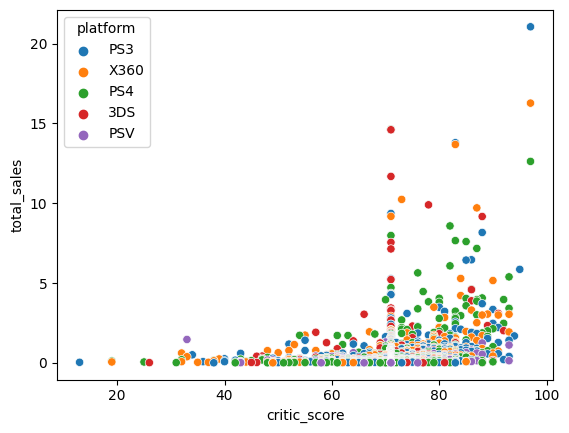

In [37]:
#sns.scatterplot(x="variable_x", y="variable_y", data=df, hue='platform')

sns.scatterplot(x="critic_score", y="total_sales", data=PopPlatforms, hue='platform')

In [38]:
print("La correlación entre críticas profesionales y ventas es de ",PopPlatforms["total_sales"].corr(PopPlatforms["critic_score"]))

La correlación entre críticas profesionales y ventas es de  0.28373888943634207


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

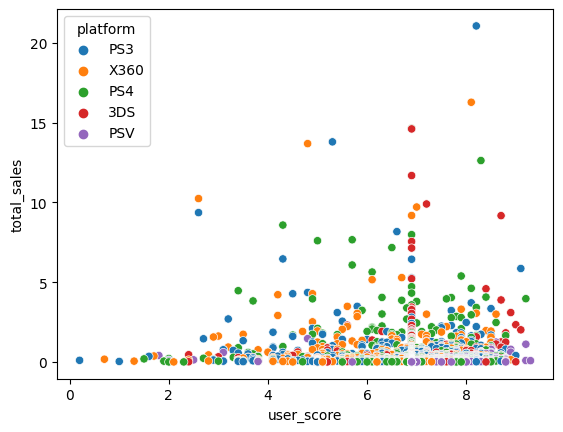

In [39]:
sns.scatterplot(x="user_score", y="total_sales", data=PopPlatforms, hue='platform')

In [40]:
print("La correlación entre evaluaciones de usuario y ventas es de ",PopPlatforms["total_sales"].corr(PopPlatforms["user_score"]))

La correlación entre evaluaciones de usuario y ventas es de  -0.007985252511547138


#### De estos últimos dos resultados podemos concluír que, como se podía esperar, las ventas son afectadas mucho más por la evaluación de la crítica profesional que de usuarios comunes, donde es prácticamente 0.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

En este apartado debes tener en cuenta los siguiente:

1. También debes hacer el estudio con los datos de *user_score*
2. En análisis de correlación lo estás haciendo entre las mismas columnas (*total_sales*), por eso estás obteniendo prácticamente 1. Recuerda emplear la función `corr` entre *total_sales* y los datos de calificación *user_score* y *critic_score*
3. No olvides incluir tus análisis e interpretaciones de los datos

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo con los ajustes

</div>

#### La correlación observada entre las críticas de expertos y las ventas de las plataformas populares es nuy alta

#### compara las ventas de los mismos juegos en otras plataformas.

In [41]:
other_plats=dfpost12[(dfpost12['platform']!='3DS')|(dfpost12['platform']!='PS3')|(dfpost12['platform']!='PS4')|(dfpost12['platform']!='PSV')|(dfpost12['platform']!='X360')]
otherplatsyearsok=other_plats[other_plats['year_of_release']>=2012]
yearly_otherplats=other_plats['year_of_release']
yearly_otherplats=other_plats.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

Text(0.5, 1.0, 'Comparación de Plataformas por  Año')

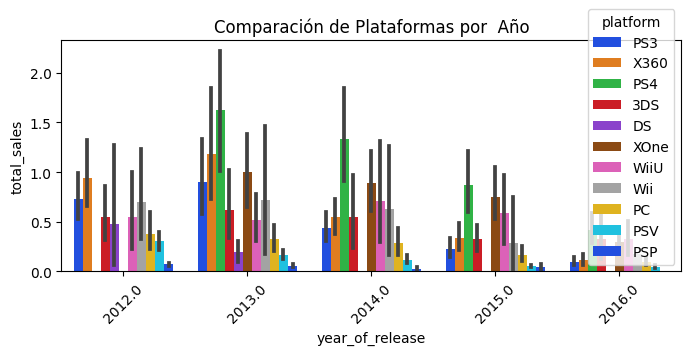

In [42]:
plt.figure(figsize=(8,3))
sns.barplot(data=otherplatsyearsok, x='year_of_release',y='total_sales',hue='platform', palette='bright')
plt.xticks(rotation=45)
plt.title('Comparación de Plataformas por  Año')

#### Podemos ver que al estudiar las demás plataformas en el período coprendido entre 2012y 2016, las ventas son mucho menores, y todas tienden a decrecer.

In [43]:
año16=df[df['year_of_release']==2016]

Text(0.5, 1.0, 'ventas 2016')

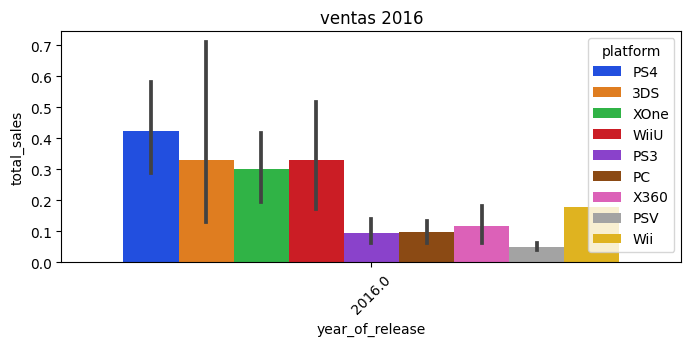

In [44]:
plt.figure(figsize=(8,3))
sns.barplot(data=año16, y='total_sales',x='year_of_release',hue='platform', palette='bright')
plt.xticks(rotation=45)
plt.title('ventas 2016')

### Pero 2016 no fue bueno para nadie

### Distribución general de los juegos por género

In [45]:
generos=dfpost12.groupby('genre')['total_sales'].sum()

In [46]:
generos

genre
Action          441.12
Adventure        29.43
Fighting         44.49
Misc             85.04
Platform         61.00
Puzzle            4.89
Racing           53.50
Role-Playing    192.80
Shooter         304.73
Simulation       35.12
Sports          181.07
Strategy         13.34
Name: total_sales, dtype: float64

#### Los géneros que van dirigidos a jóvenes adultos, como Acción y Shooter son más rentables, sin embargo estos que pueden resultar atractivos para edades menores, como Puzzle, tienen menos ventas.

## Paso 4

In [47]:
#PopPlatforms

### Variaciones en cuotas de mercado 

<AxesSubplot:xlabel='platform'>

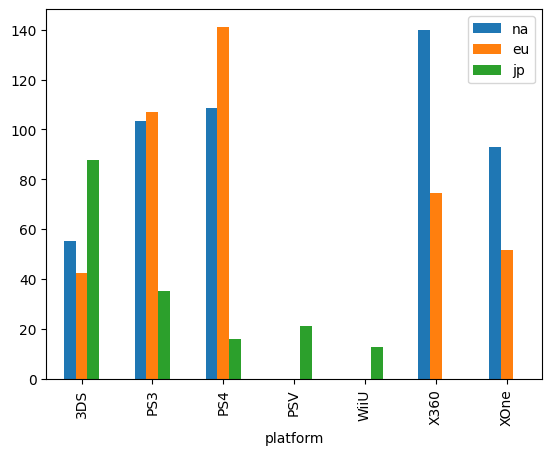

In [48]:
na = dfpost12.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu = dfpost12.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp = dfpost12.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

pf = pd.DataFrame({'na':na, 'eu':eu, 'jp':jp}).fillna(0)
pf.plot(kind='bar')

#### En el gáfico anterior podemos ver la diferencia en las vantas para cada una de las plataformas. Llama la atención que las consolas como Play Station o X Box no tienen tantas ventas en japónl

### Cómo las celificaciones ESRB afectan a las ventas en distintas regiones

<AxesSubplot:title={'center':'Ventas por Género'}, xlabel='genre', ylabel='Ventas'>

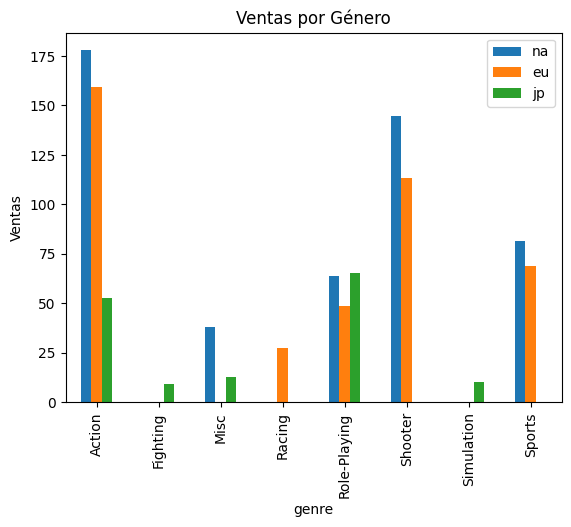

In [49]:
na = dfpost12.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu = dfpost12.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp = dfpost12.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

pf = pd.DataFrame({'na':na, 'eu':eu, 'jp':jp}).fillna(0)
pf.plot(kind='bar',ylabel='Ventas', title='Ventas por Género')


<Figure size 400x800 with 0 Axes>

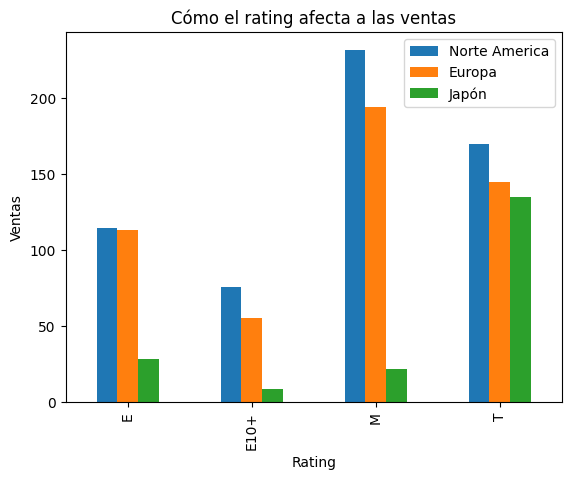

In [50]:
dfsmp = dfpost12.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plt.figure(figsize=(4,8))
dfsmp.plot(kind='bar')
plt.title('Cómo el rating afecta a las ventas')
plt.xlabel('Rating')
plt.ylabel('Ventas')
plt.legend(['Norte America', 'Europa', 'Japón'])
plt.show()

#### Las evaluaciones de M y T suelen ir acompañamas de mayores ventas, particularment en el mercado norteamericano.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo obteniendo las gráficas, pero recuerda que es necesario que las analices y les des sentido en el contexto del caso de estudio, es decir, que se conviertan en una herramienta útil para la toma de decisiones,

</div>

## Paso 5
### Pruebas de hipótesis

### 1- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [51]:
alpha = .05
dfpost12 = dfpost12.fillna(0)

In [52]:
lev1=st.levene(dfpost12[dfpost12['platform']=='XOne']['user_score'], dfpost12[dfpost12['platform']=='PC']['user_score'])
lev1

LeveneResult(statistic=7.382556870889349, pvalue=0.006816651327560036)

#### En este caso, el valor de Lavene es menor que el p value de 0.05, por lo que se rechaza la hipótesis nula de  que las varianzas de ambos  conjuntos son iguales, es rechazada.

In [67]:
test_results = st.ttest_ind(dfpost12[dfpost12['platform']=='XOne']['user_score'], 
                            dfpost12[dfpost12['platform']=='PC']['user_score'], equal_var=False)

In [68]:
print("Valor p de la prueba t para comparar la media de ambas plataformas es:", test_results.pvalue)

Valor p de la prueba t para comparar la media de ambas plataformas es: 0.6175319411762216


#### Este resultado nos indica que no hay evidencia suficiente para afirmar que los promedios de las evaluaciones de usiario son diferentes. Con esto, deebriamos rechazar la hipótesis nula.

### 2- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [61]:
lev2=st.levene(dfpost12[dfpost12['genre']=='Action']['user_score'], dfpost12[dfpost12['genre']=='Sports']['user_score'])
lev2

LeveneResult(statistic=110.89649019932965, pvalue=6.121323629037283e-25)

#### En este caso, el valor de Lavene es menor que el p value de 0.05, por lo que se rechaza la hipótesis nula de  que las varianzas de ambos  conjuntos son iguales, es rechazada.

In [62]:
test_results2 = st.ttest_ind(dfpost12[dfpost12['genre']=='Action']['user_score'], dfpost12[dfpost12['genre']=='Sports']['user_score'], equal_var=False)

In [63]:
print("Valor p de la prueba t para comparar la media de ambas plataformas es:", test_results2.pvalue)

Valor p de la prueba t para comparar la media de ambas plataformas es: 1.3345285354054547e-21


#### Con este resultado podemos concluír que los valores promedio entre ambas muestras de evaluaciones, son diferentes. Es decir, podemos aceptar la hipótesis nula

#### En este ejercicio,la hipótesis nula y alternativa se tomaron del enunciado que describía la hiótesis a probar  / refutar.


#### Para hacerlo se utilizó el método ttest_ind de Statistics. Permite trabajar con la media del conjunto de datos que se le provea y así calcular el valor p, con un alpha de 0.05

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Rodrigo aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente ajuste en la prueba de hipótesis

</div>

## Conclusión General

#### A lo largo de este ejercicio tuvimos la oportunidad de revisar varios aspectos relacionadoa al comportamiento de ventas y permanencia en el tiempo de varias plataformas de videojuegos.Fue interesante echar mano de conocimientos adquiridos en fases anteriores de este curso, y ponerlos en práctica en conjunto con otros de fases distintas.
#### Además, el trabajar desde el perincipio con un documento en blando es un tipo diferente de reto, prto, creo yo, a la vez muy enriquecedor y hasta cirto punto, más realista.